In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
file_path = '/content/drive/MyDrive/cv-corpus-22.0-delta-2025-06-20-en.tar.gz'

In [ ]:
import tarfile
with tarfile.open(file_path, "r:gz") as tar:
    tar.extractall(path='/content/')
    print("✅ تم فك الضغط في /content/")

✅ تم فك الضغط في /content/


In [ ]:
!ls /content

cv-corpus-22.0-delta-2025-06-20  drive	sample_data


In [ ]:
!ls /content/cv-corpus-22.0-delta-2025-06-20/en

clip_durations.tsv  other.tsv		       validated_sentences.tsv
clips		    reported.tsv	       validated.tsv
invalidated.tsv     unvalidated_sentences.tsv


In [ ]:
import pandas as pd
import shutil
import os

# تحديد المسارات
base_path = "/content/cv-corpus-22.0-delta-2025-06-20/en"
tsv_path = os.path.join(base_path, "validated.tsv")
clips_path = os.path.join(base_path, "clips")
output_dir = "/content/my_20_samples"

# إنشاء مجلد لحفظ العينات
os.makedirs(output_dir, exist_ok=True)

# قراءة ملف الجمل الصوتية
df = pd.read_csv(tsv_path, sep='\t')

# التأكد من الأعمدة المطلوبة
if 'path' in df.columns and 'sentence' in df.columns:
    samples = df[['path', 'sentence']].head(20)

    # نسخ أول 20 ملف صوتي
    for _, row in samples.iterrows():
        src = os.path.join(clips_path, row['path'])
        dst = os.path.join(output_dir, row['path'])
        shutil.copyfile(src, dst)

    # حفظ الجمل في ملف metadata
    samples.to_csv(os.path.join(output_dir, 'metadata.csv'), index=False)

    print("✅ تم استخراج أول 20 ملف صوتي إلى:", output_dir)
else:
    print("❌ ملف validated.tsv لا يحتوي على الأعمدة المطلوبة: 'path' و 'sentence'")


✅ تم استخراج أول 20 ملف صوتي إلى: /content/my_20_samples


In [ ]:
!pip install -q openai-whisper
!sudo apt -q update && sudo apt -q install -y ffmpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.1 MB/s

In [ ]:
import whisper
import os
import pandas as pd
#if i need (tiny-small-base-mediam-large)
model = whisper.load_model("base")

# تحديد المسار للمجلد
audio_folder = "/content/my_20_samples"
metadata_path = os.path.join(audio_folder, "metadata.csv")
output_path = os.path.join(audio_folder, "whisper_transcripts.csv")

# قراءة الجمل الأصلية
df = pd.read_csv(metadata_path)

# تحويل كل ملف صوتي لنص
transcripts = []
for i, row in df.iterrows():
    file_path = os.path.join(audio_folder, row['path'])
    result = model.transcribe(file_path, language="en")
    transcripts.append({
        "file": row['path'],
        "original_sentence": row['sentence'],
        "transcribed_text": result['text'],
        "confidence": result.get("avg_logprob", "N/A")
    })

# حفظ النتائج
output_df = pd.DataFrame(transcripts)
output_df.to_csv(output_path, index=False)

print("تم تحويل كل الملفات بنجاح. النتائج في:", output_path)


100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 102MiB/s]
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  

تم تحويل كل الملفات بنجاح. النتائج في: /content/my_20_samples/whisper_transcripts.csv


In [ ]:
!pip install -q jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.1 MB/s eta 0:00:00


                           file       wer  confidence
0  common_voice_en_43199993.mp3  0.200000         NaN
1  common_voice_en_42736613.mp3  0.000000         NaN
2  common_voice_en_42798328.mp3  0.416667         NaN
3  common_voice_en_43204215.mp3  0.071429         NaN
4  common_voice_en_42706055.mp3  0.333333         NaN


/tmp/ipython-input-16-994966079.py:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


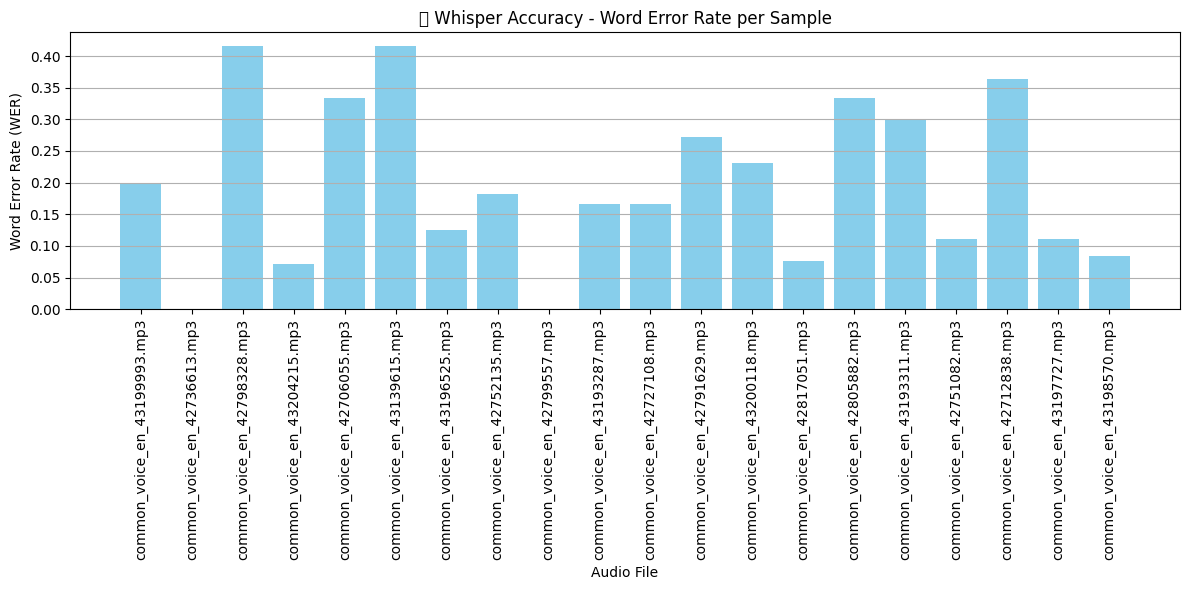

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from jiwer import wer

# تحميل نتائج Whisper
df = pd.read_csv('/content/my_20_samples/whisper_transcripts.csv')

# حساب WER لكل سطر
df['wer'] = df.apply(lambda row: wer(row['original_sentence'], row['transcribed_text']), axis=1)

# عرض أول 5 نتائج كمثال
print(df[['file', 'wer', 'confidence']].head())

# رسم WER لكل ملف
plt.figure(figsize=(12, 6))
plt.bar(df['file'], df['wer'], color='skyblue')
plt.xticks(rotation=90)
plt.ylabel("Word Error Rate (WER)")
plt.xlabel("Audio File")
plt.title("🔍 Whisper Accuracy - Word Error Rate per Sample")
plt.grid(axis='y')
plt.tight_layout()
plt.show()